# 可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [1]:
import duplicates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 数据导入

In [2]:
yuandata = pd.read_csv("penguins.csv")

In [3]:
yuandata.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 数据评估

In [4]:
yuandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


数据中的species，island，sex为企鹅的分类数据，可以把数据类型都转换为Category。

### 缺失值处理

In [5]:
yuandata[yuandata['culmen_depth_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


分析结果有两只企鹅没有记录其culmen_length_mm，culmen_depth_mm等数据，对本研究没有帮助，可以删除

### 重复值检查

In [6]:
duplicates = yuandata[yuandata.duplicated()]
print("重复行的数量：", duplicates.shape[0])

重复行的数量： 0


经检查重复行数量为0

### 评估无效和错误数据

In [7]:
yuandata.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
yuandata.sample(20)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
308,Gentoo,Biscoe,47.5,14.0,212.0,4875.0,FEMALE
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,MALE
212,Chinstrap,Dream,51.9,19.5,206.0,3950.0,MALE
295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,MALE
187,Chinstrap,Dream,47.5,16.8,199.0,3900.0,FEMALE
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,FEMALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE
119,Adelie,Torgersen,41.1,18.6,189.0,3325.0,MALE
174,Chinstrap,Dream,43.2,16.6,187.0,2900.0,FEMALE
49,Adelie,Dream,42.3,21.2,191.0,4150.0,MALE


经检查数据正常

### 评估不一致数据

In [9]:
yuandata["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [10]:
yuandata["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [11]:
yuandata["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [12]:
yuandata[yuandata["sex"]=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


其性别信息没有记录，可能影响分析结果，数量较少，可以删除

## 数据清理

1.数据中的species，island，sex为企鹅的分类数据，可以把数据类型都转换为Category。
2.分析结果有两只企鹅没有记录其culmen_length_mm，culmen_depth_mm等数据，对本研究没有帮助，可以删除.
3.其性别信息没有记录，可能影响分析结果，数量较少，可以删除

In [13]:
cleaned_data = yuandata.copy()

In [14]:
cleaned_data['species'] = cleaned_data['species'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")

In [15]:
cleaned_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [16]:
cleaned_data.drop(3,inplace=True)
cleaned_data.drop(339,inplace=True)
cleaned_data = cleaned_data[cleaned_data['sex'] != '.']

# 数据可视化

In [17]:
# 设置色盘
sns.set_palette("pastel")

In [18]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 绘制三个分类变量的饼图

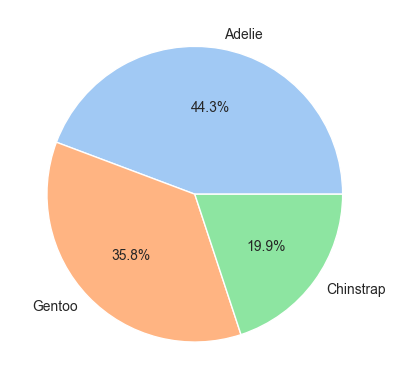

In [19]:
specice_counts = cleaned_data["species"].value_counts()
plt.pie(specice_counts,autopct='%1.1f%%',labels=specice_counts.index)
plt.savefig('bingtu1.png')
plt.show()

样本分析，三种企鹅中Adelie占比最大，Gentoo占比其次，Chinstrap占比最小只有五分之一左右。

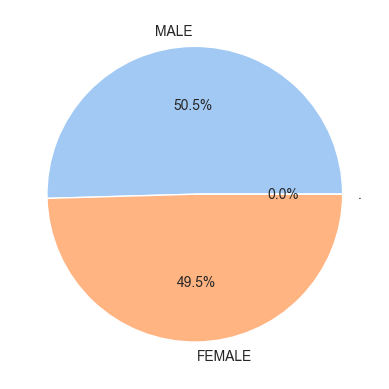

In [20]:
sex_counts = cleaned_data["sex"].value_counts()
plt.pie(sex_counts,autopct='%1.1f%%',labels=sex_counts.index)
plt.savefig('bingtu2.png')
plt.show()

企鹅性别占比接近各占百分之五十，推测样本可能为随机取样

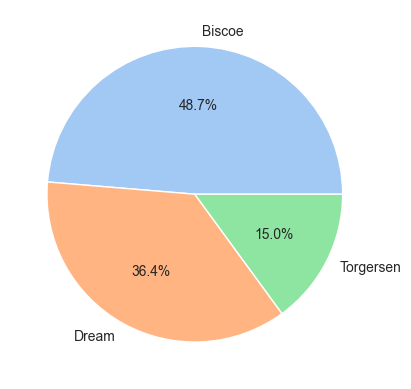

In [21]:
island_counts = cleaned_data["island"].value_counts()
plt.pie(island_counts,autopct='%1.1f%%',labels=island_counts.index)
plt.savefig('bingtu3.png')
plt.show()

样本分析，三个岛中B岛占比最大，D岛占比其次，T岛占比最小。

### 进一步观察各个岛上企鹅数量

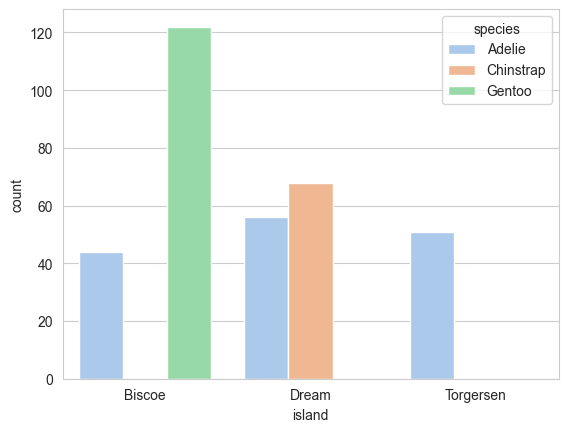

In [22]:
sns.countplot(cleaned_data,x="island",hue="species")
plt.savefig('zhutu2.png')
plt.show()

In [23]:
plt.show()

#### 分析结果：A类企鹅在三个岛上都有，G类企鹅只在B岛上，C类企鹅旨在D岛上，T岛上只有A类企鹅。

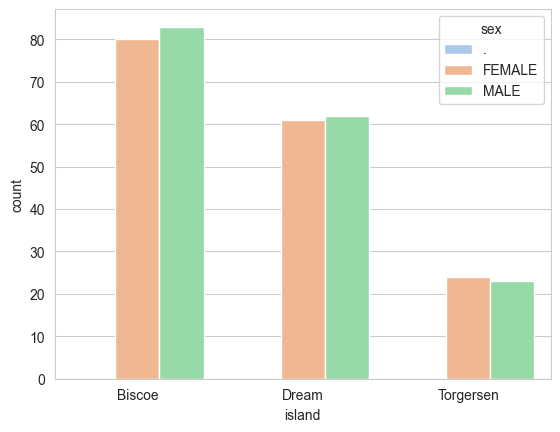

In [24]:
sns.countplot(cleaned_data,x="island",hue="sex")
plt.savefig('zhutu2.png')
plt.show()

#### 且三个岛上的企鹅性别比例也都接近1：1，进一步推测其为随机取样。

### 查看数值之间的两两关系

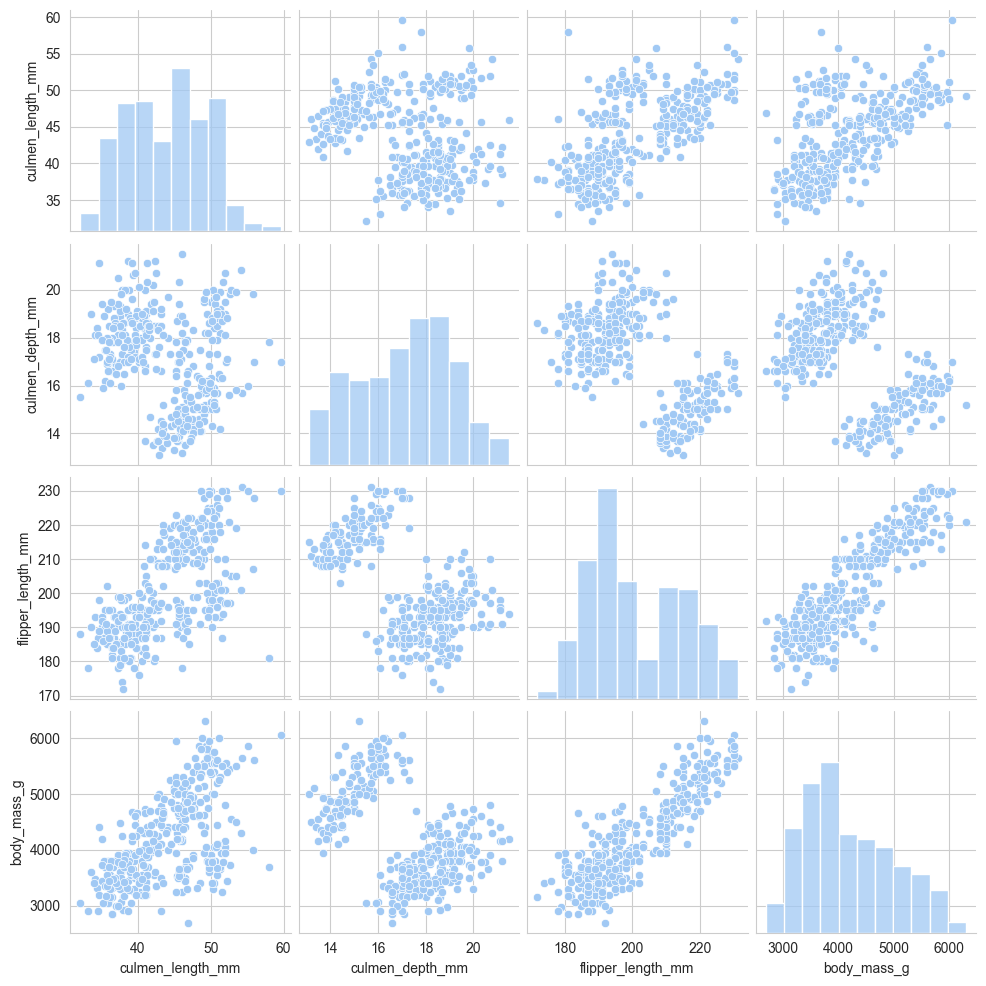

In [25]:
tu3=sns.pairplot(cleaned_data)
plt.show()

1.由直方图可以看出culmen_length_mm：企鹅嘴峰的长度
culmen_depth_mm：企鹅嘴峰的深度
flipper_length_mm：企鹅鳍的长度
body_mass_g：企鹅体重
这四种数据没有明显的正态分布，原因分析有两点：1.多个种群数据放在一起，所以有的呈双峰或偏峰。2.样本数量较小。

### 进一步寻找特征，对数据继续进行区分

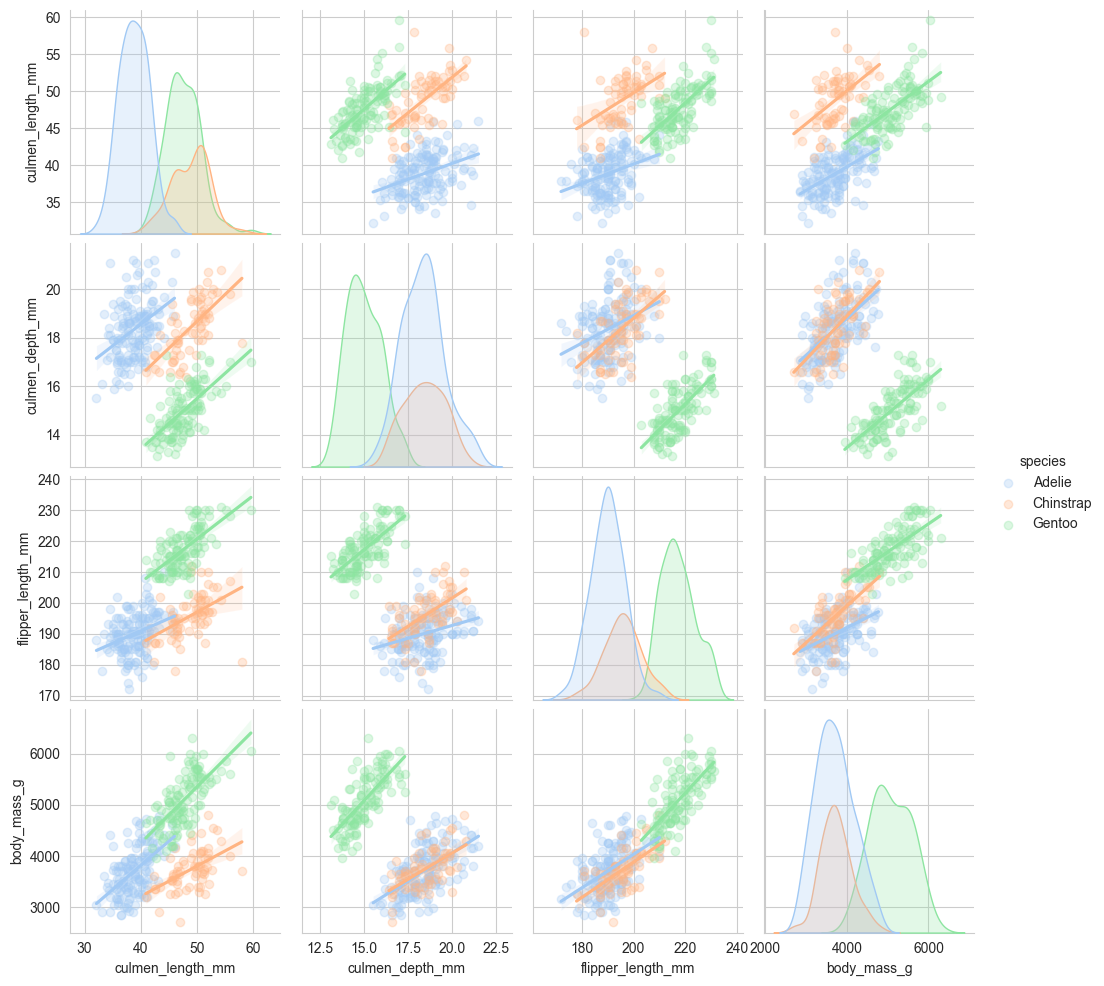

In [26]:
tu1=sns.pairplot(cleaned_data,hue="species",kind='reg',plot_kws={'scatter_kws':{'alpha':0.3}})
plt.show()

1.区分种群后可以明显看到culmen_length_mm：企鹅嘴峰的长度，culmen_depth_mm：企鹅嘴峰的深度，flipper_length_mm：企鹅鳍的长度，body_mass_g：企鹅体重这四种数据有较为明显的正态分布，说明种群不同这四个特征有较为明显区别。
2.b通过散点图也可以看出culmen_length_mm和culmen_depth_mm在区分企鹅种类上可以较好的把企鹅类别分开。
3.散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。


### 以性别为划分属性

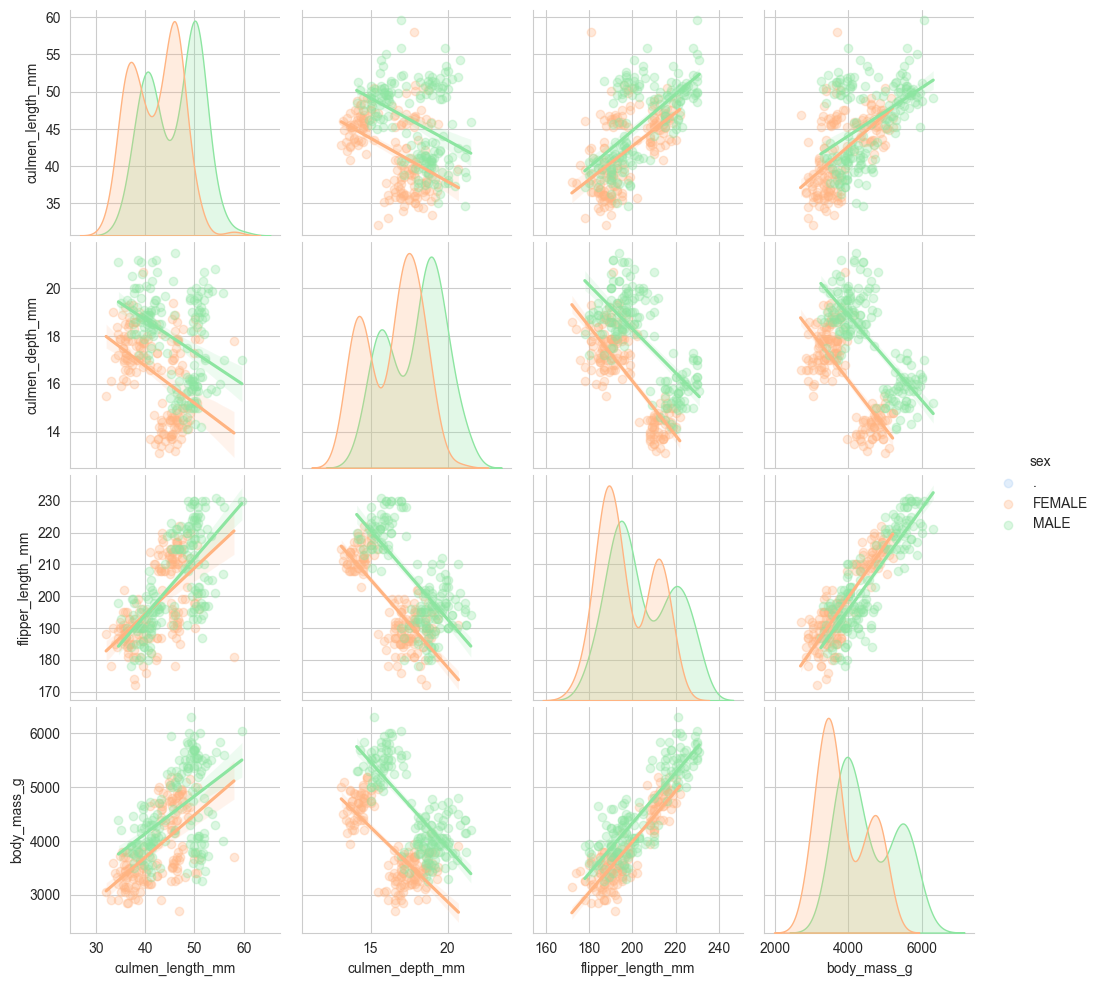

In [27]:
tu2=sns.pairplot(cleaned_data,hue="sex",kind='reg',plot_kws={'scatter_kws':{'alpha':0.3}})
plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。

In [28]:
tu1.savefig('tu1.png')

In [29]:
tu2.savefig('tu2.png')
tu3.savefig('tu3.png')